# General import functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scanpy.api as sc
from igraph import *
from MulticoreTSNE import MulticoreTSNE as TSNE #faster TSNE alternative
from anndata import read_h5ad
from anndata import read_csv
sc.logging.print_versions()

scanpy==1.4.3+60.gb3dc34a anndata==0.6.22rc1 umap==0.3.9 numpy==1.16.4 scipy==1.3.0 pandas==0.23.4 scikit-learn==0.20.1 statsmodels==0.10.0rc2 python-igraph==0.7.1 louvain==0.6.1


In [3]:
pwd

'/home/ubuntu/maca-data-analysis/sapiens'

# Load the data

In [4]:
tissue = 'Pancreas endocrine'

In [5]:
tiss_facs = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered-PancreasEndocrine.h5ad')
tiss_droplet = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-endopancreas.h5ad')
tiss_facs, tiss_droplet


(AnnData object with n_obs × n_vars = 722 × 24697 
     obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes'
     var: 'n_cells', AnnData object with n_obs × n_vars = 3308 × 21380 
     obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'
     var: 'n_cells')

In [ ]:
bladder_louvain_cell_ontology_droplet = {}
bladder_louvain_cell_ontology_droplet['0'] = ...
bladder_louvain_cell_ontology_droplet

In [ ]:
tiss.obs['cell_ontology_class'] = tiss.obs['louvain'].map(bladder_louvain_cell_ontology_droplet)
set(tiss.obs['cell_ontology_class'])

# Load the data

In [ ]:
adata

In [ ]:
set(adata.obs['tissue'])

Filter out cells with less than 200 genes detected and genes expressed in less than 3 cells

In [ ]:
adata

save the filtered data

In [ ]:
adata.write('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered.h5ad')

# Annotate the FACS data

In [121]:
tiss_facs = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered-PancreasEndocrine.h5ad')

adata = tiss_facs
adata

AnnData object with n_obs × n_vars = 722 × 24697 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes'
    var: 'n_cells'

In [122]:
igg_genes = adata.var_names[adata.var_names.str.startswith('IGH')]
igg_genes

Index(['IGHMBP2'], dtype='object', name='index')

In [123]:
ercc_genes = adata.var_names[adata.var_names.str.startswith('ERCC-')]
ercc_genes

Index(['ERCC-00002', 'ERCC-00003', 'ERCC-00004', 'ERCC-00009', 'ERCC-00012',
       'ERCC-00013', 'ERCC-00014', 'ERCC-00019', 'ERCC-00022', 'ERCC-00024',
       'ERCC-00025', 'ERCC-00028', 'ERCC-00031', 'ERCC-00033', 'ERCC-00034',
       'ERCC-00035', 'ERCC-00039', 'ERCC-00042', 'ERCC-00043', 'ERCC-00044',
       'ERCC-00046', 'ERCC-00051', 'ERCC-00053', 'ERCC-00054', 'ERCC-00058',
       'ERCC-00059', 'ERCC-00060', 'ERCC-00062', 'ERCC-00067', 'ERCC-00069',
       'ERCC-00071', 'ERCC-00073', 'ERCC-00074', 'ERCC-00076', 'ERCC-00077',
       'ERCC-00078', 'ERCC-00079', 'ERCC-00084', 'ERCC-00085', 'ERCC-00092',
       'ERCC-00095', 'ERCC-00096', 'ERCC-00099', 'ERCC-00108', 'ERCC-00109',
       'ERCC-00111', 'ERCC-00112', 'ERCC-00113', 'ERCC-00116', 'ERCC-00126',
       'ERCC-00130', 'ERCC-00131', 'ERCC-00134', 'ERCC-00136', 'ERCC-00137',
       'ERCC-00138', 'ERCC-00143', 'ERCC-00144', 'ERCC-00145', 'ERCC-00147',
       'ERCC-00148', 'ERCC-00150', 'ERCC-00154', 'ERCC-00157', 'ERCC-00160',

In [124]:
adata = adata[:,~adata.var_names.isin(ercc_genes)]
adata

View of AnnData object with n_obs × n_vars = 722 × 24626 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes'
    var: 'n_cells'

In [125]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_genes(adata, min_cells=3)

Trying to set attribute `.obs` of view, making a copy.


In [126]:
set(adata.obs['tissue'])

{'PancreasEndocrine'}

Compute the nUMIS (using 'n_counts' as generic column name)

In [127]:
adata.obs['n_counts'] = adata.X.sum(axis=1)#.A1

Look at the overall distribution of the data

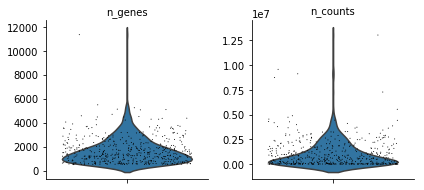

In [128]:
sc.pl.violin(adata, ['n_genes', 'n_counts'],jitter=0.4, multi_panel=True)

/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:318: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


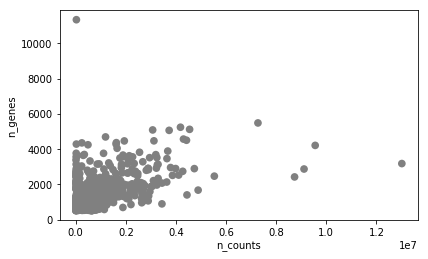

In [129]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

Because we're doing first exploratory pass let's remove cells that have more than 5000 genes given that those have higher chances of being doublets

In [130]:
#adata = adata[adata.obs['n_genes'] < 5000, :]

In [131]:
adata

AnnData object with n_obs × n_vars = 507 × 21850 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes', 'n_counts'
    var: 'n_cells'

Following the standard pipeline, next we normalize, log, compute highly variable genes and scale

In [132]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [133]:
sc.pp.log1p(adata)


In [134]:
adata.raw = adata

In [135]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

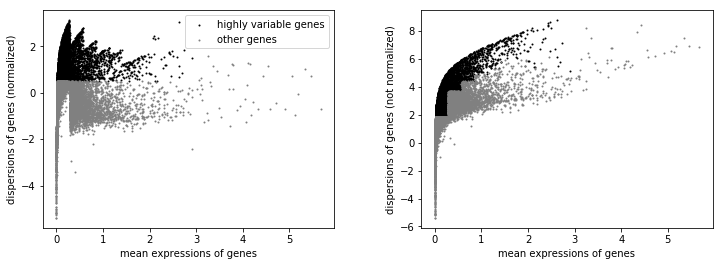

In [136]:
sc.pl.highly_variable_genes(adata)


In [137]:
adata


AnnData object with n_obs × n_vars = 507 × 21850 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [138]:
sc.pp.scale(adata, max_value=10)


Next we compute PCA

In [139]:
sc.tl.pca(adata, svd_solver='arpack')


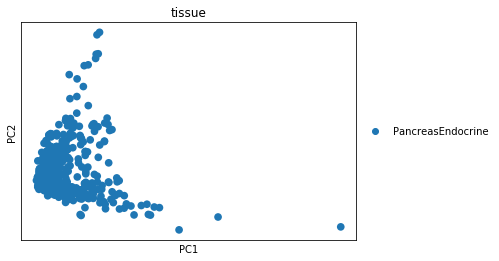

In [140]:
sc.pl.pca(adata, color='tissue')


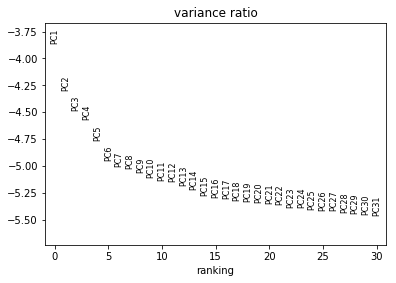

In [141]:
sc.pl.pca_variance_ratio(adata, log=True)


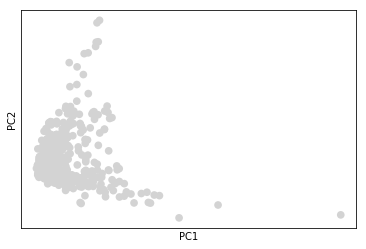

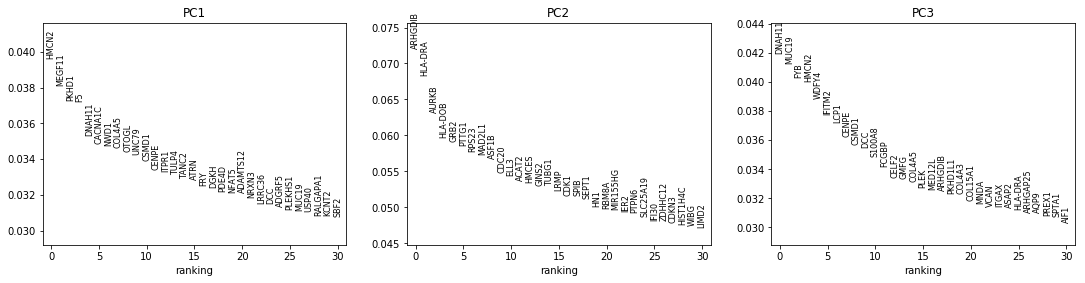

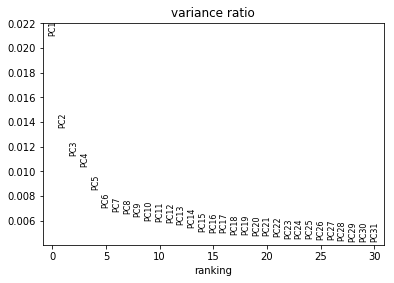

In [142]:
sc.pl.pca_overview(adata)

Now we're ready to start fishing out some structure in the data

In [143]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=8)


In [144]:
sc.tl.louvain(adata,resolution=.5)
sc.tl.leiden(adata,resolution=.5)

In [145]:
sc.tl.umap(adata)


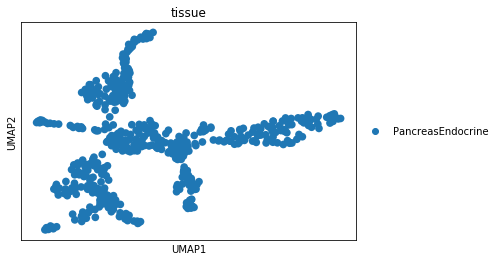

In [146]:
# sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color=['tissue'])

In [147]:
set(adata.obs['tissue'])

{'PancreasEndocrine'}

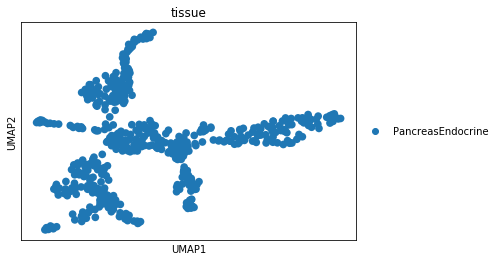

In [148]:
sc.pl.umap(adata, color=['tissue'],use_raw=False)

Let's take a look at one tissue as e.g. for batch effect...

In [149]:
adata.obs.columns

Index(['plate', 'well', 'tissue', 'primary_sort', 'anatomical_position',
       'sort_order', 'well_group', 'excluded', 'sort_direction',
       'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute',
       'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun',
       'additional_notes', 'n_genes', 'n_counts', 'louvain', 'leiden'],
      dtype='object')

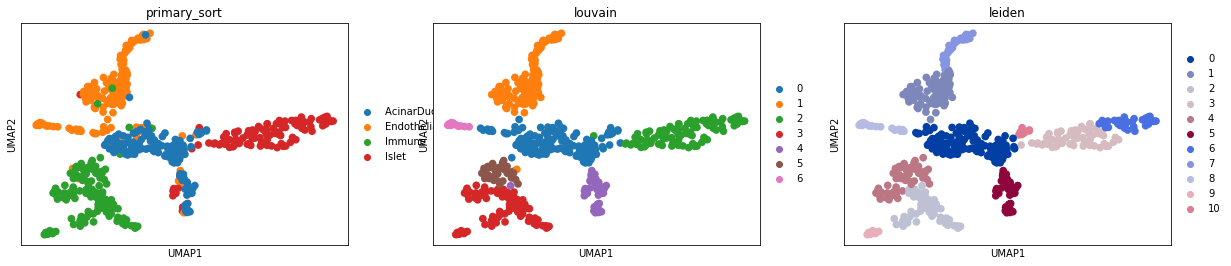

In [150]:
sc.pl.umap(adata, color=['primary_sort','louvain','leiden'])

Looking good! Into clustering...

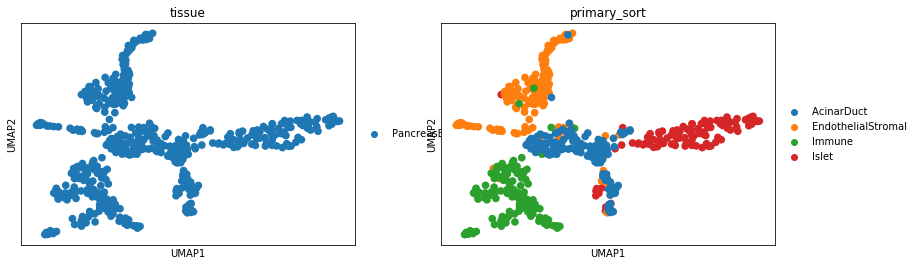

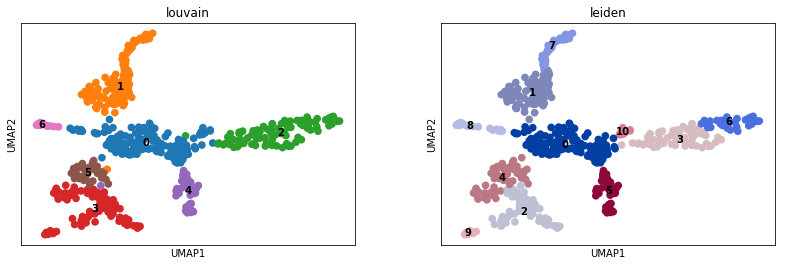

In [151]:
sc.pl.umap(adata, color=['tissue','primary_sort'])
sc.pl.umap(adata, color=['louvain','leiden'], legend_loc='on data')

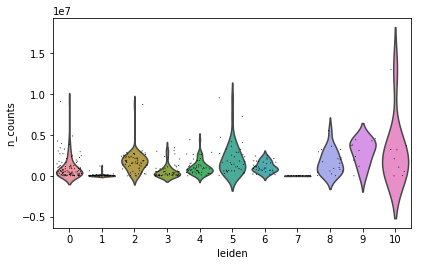

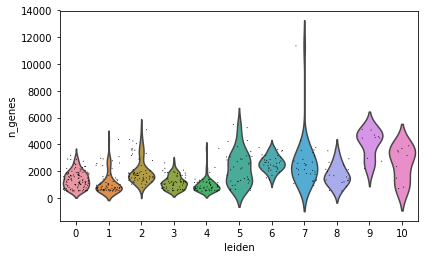

In [152]:
sc.pl.violin(adata, ['n_counts'],jitter=0.4, groupby='leiden')
sc.pl.violin(adata, ['n_genes'],jitter=0.4, groupby='leiden')

Using the wilcoxon rank test we can compute the marker genes for each of the 45 global clusters

In [153]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

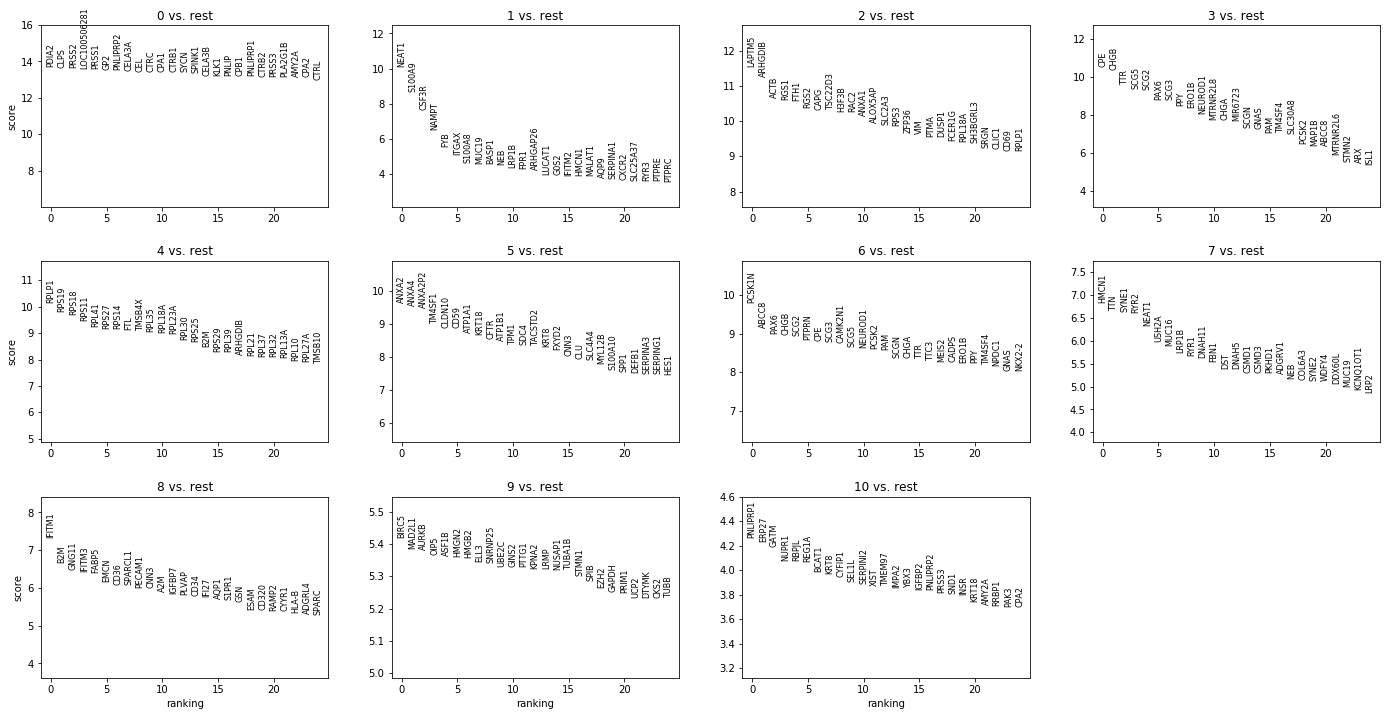

In [154]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [155]:
sapiens_rank_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
# sapiens_rank_genes.to_csv('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-global-rank-genes.csv')
sapiens_rank_genes.head(50)

,0,1,2,3,4,5,6,7,8,9,10
0,PDIA2,NEAT1,LAPTM5,CPE,RPLP1,ANXA2,PCSK1N,HMCN1,IFITM1,BIRC5,PNLIPRP1
1,CLPS,S100A9,ARHGDIB,CHGB,RPS19,ANXA4,ABCC8,TTN,B2M,MAD2L1,ERP27
2,PRSS2,CSF3R,ACTB,TTR,RPS18,ANXA2P2,PAX6,SYNE1,GNG11,AURKB,GATM
3,LOC100506281,NAMPT,RGS1,SCG5,RPS11,TM4SF1,CHGB,RYR2,IFITM3,OIP5,NUPR1
4,PRSS1,FYB,FTH1,SCG2,RPL41,CLDN10,SCG2,NEAT1,FABP5,ASF1B,RBPJL
5,GP2,ITGAX,RGS2,PAX6,RPS27,CD59,PTPRN,USH2A,EMCN,HMGN2,REG1A
6,PNLIPRP2,S100A8,CAPG,SCG3,RPS14,ATP1A1,CPE,MUC16,CD36,HMGB2,BCAT1
7,CELA3A,MUC19,TSC22D3,PPY,FTL,KRT18,SCG3,LRP1B,SPARCL1,ELL3,KRT8
8,CEL,BASP1,H3F3B,ERO1B,TMSB4X,CFTR,CAMK2N1,RYR1,PECAM1,SNRNP25,CYFIP1
9,CTRC,NEB,RAC2,NEUROD1,RPL35,ATP1B1,SCG5,DNAH11,CNN3,UBE2C,SEL1L


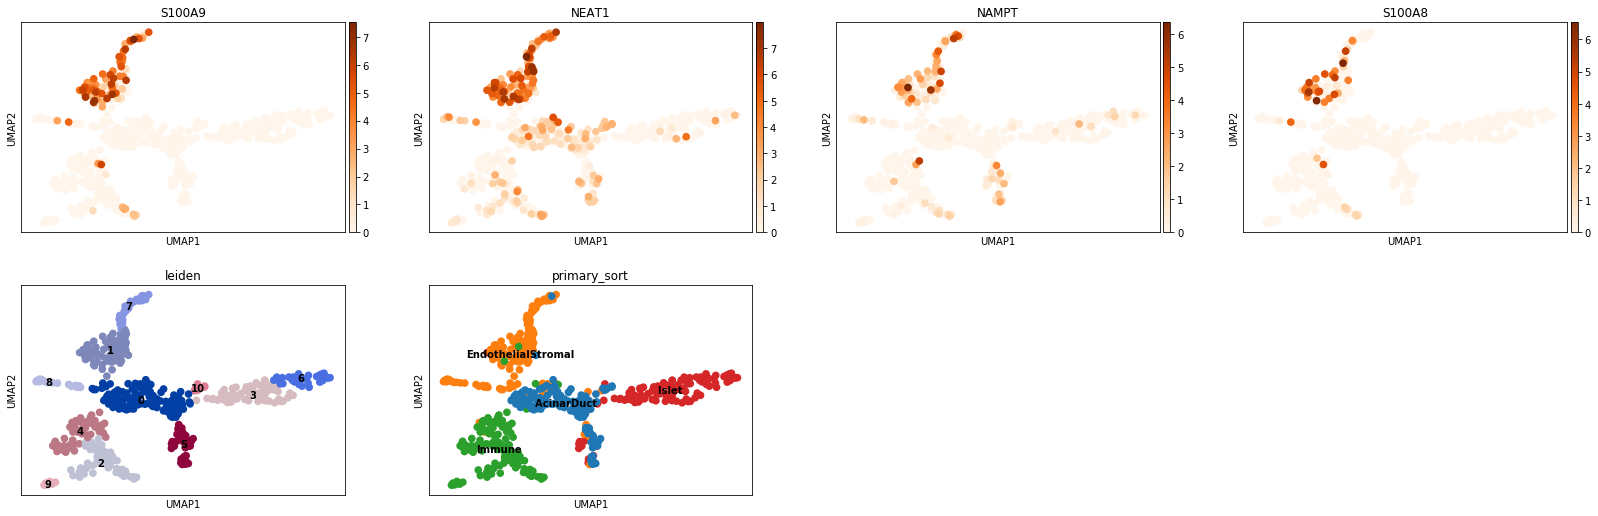

In [177]:
sc.pl.umap(adata,color=['S100A9', 'NEAT1', 'NAMPT', 'S100A8','leiden','primary_sort'],legend_loc='on data',cmap='Oranges')


In [ ]:
bladder_louvain_cell_ontology_facs = {}
bladder_louvain_cell_ontology_facs['0'] = 'mast cell (also has basophil marker)' #TPSAB1,TPSB2
bladder_louvain_cell_ontology_facs['1'] = 'endothelial' #PECAM1, VWF, CLDN5
bladder_louvain_cell_ontology_facs['2'] = 'unknown'
bladder_louvain_cell_ontology_facs['3'] = 'fibroblast' #DCN, PDGFRA
bladder_louvain_cell_ontology_facs['4'] = ''
bladder_louvain_cell_ontology_facs[''] = ''
bladder_louvain_cell_ontology_facs[''] = ''
bladder_louvain_cell_ontology_facs

In [178]:
sapiens_rank_genes['2'].values

array(['LAPTM5', 'ARHGDIB', 'ACTB', 'RGS1', 'FTH1', 'RGS2', 'CAPG',
       'TSC22D3', 'H3F3B', 'RAC2', 'ANXA1', 'ALOX5AP', 'SLC2A3', 'RPS3',
       'ZFP36', 'VIM', 'PTMA', 'DUSP1', 'FCER1G', 'RPL18A', 'SH3BGRL3',
       'SRGN', 'CLIC1', 'CD69', 'RPLP1', 'PFN1', 'FTL', 'TMSB4X', 'EIF1',
       'ALOX5', 'TMSB10', 'HLA-E', 'RPL19', 'CTSD', 'LAPTM4A', 'RPS14',
       'S100A6', 'RPL30', 'RPS6', 'EMP3', 'HLA-H', 'S100A4', 'CD37',
       'B2M', 'RPL13A', 'EIF2S3', 'GNB2L1', 'OAZ1', 'LITAF', 'GRB2',
       'CFL1', 'EEF1A1', 'HLA-C', 'TPSB2', 'TPSAB1', 'RPS18', 'CD63',
       'PLIN2', 'FTH1P3', 'STK17B', 'CKLF', 'RPL15', 'RPL23', 'HPGDS',
       'NFKBIA', 'CNBP', 'SAMSN1', 'TYROBP', 'RPL23A', 'YWHAZ', 'LAT2',
       'RPS19', 'RPS15', 'CAPZA1', 'RPL10', 'MS4A2', 'RPL32', 'CPA3',
       'RPL18', 'TPSD1', 'RPS23', 'RPS27', 'HLA-A', 'KIT', 'ARPC2',
       'SQSTM1', 'ARF1', 'ADRB2', 'C1orf186', 'GPX1', 'UBB', 'CD44',
       'RPL21', 'ASAH1', 'RPL13', 'FXYD5', 'FOS', 'RPL37', 'ARPC3',
       'LDHB'],

In [183]:
pancreas_endocrine_leiden_cell_ontology_facs = {}
pancreas_endocrine_leiden_cell_ontology_facs['0'] = 'acinar' #exocrine tissue, CLPS', 'PRSS1', 'GP2', 'CELA3A', 'PNLIP', 'CPA1', 'PRSS2', 'CPA2','PNLIPRP2', 'CPB1', 'PNLIPRP1', 'CTRB1', 'CEL', 'CTRC', 'PDIA2', 'AMY2A', 'CELA3B' 
pancreas_endocrine_leiden_cell_ontology_facs['1'] = 'likely tumor cells' # pdac tumor markers 'S100A9', 'NEAT1', 'NAMPT', 'S100A8'
pancreas_endocrine_leiden_cell_ontology_facs['2'] = 'immune + likely tumor' #
pancreas_endocrine_leiden_cell_ontology_facs['3'] = 'endocrine' #'CPE', 'CHGB', 'SCG2', 'PAX6', 'SCG5', 'PPY', 'TTR'
pancreas_endocrine_leiden_cell_ontology_facs['4'] = 'immune + likely tumor' #
pancreas_endocrine_leiden_cell_ontology_facs['5'] = 'ductal cell' # 'KRT18','KRT8','CFTR','ANXA2', 'ANXA4','CD44','MUC1','SOX9'
pancreas_endocrine_leiden_cell_ontology_facs['6'] = 'endocrine' #'PCSK1N', 'ABCC8', 'PAX6', 'CHGB', 'SCG2'
pancreas_endocrine_leiden_cell_ontology_facs['7'] = 'mesenchymal' #'COL11A1', 'COL12A1','FBN1','PLXNA2'
pancreas_endocrine_leiden_cell_ontology_facs['8'] = 'endothelial' #'CD36','SPARCL1', 'PECAM1',CLDN5
pancreas_endocrine_leiden_cell_ontology_facs['9'] = 'immune infiltrating' #CD79A, CD79B, ACTG1, HDAC1,EZH2,ACTB,TUBB4B
pancreas_endocrine_leiden_cell_ontology_facs['10'] = 'acinar' #AMY2A,PRSS3,RBPJL,CPA1,CPA2,CPB1, also some duct markers
pancreas_endocrine_leiden_cell_ontology_facs

{'0': 'acinar',
 '1': 'likely tumor cells',
 '2': 'immune + likely tumor',
 '3': 'endocrine',
 '4': 'immune + likely tumor',
 '5': 'ductal cell',
 '6': 'endocrine',
 '7': 'mesenchymal',
 '8': 'endothelial',
 '9': 'immune infiltrating',
 '10': 'acinar'}

Look at different cell types. The idea is to subcluster based on the global cell 

In [ ]:
bladder_epithelial = adata(adata.obs['leiden'].isin(['0','11']))

In [184]:
adata.obs['cell_ontology_class'] = adata.obs['leiden'].map(pancreas_endocrine_leiden_cell_ontology_facs)
set(adata.obs['cell_ontology_class'])

{'acinar',
 'ductal cell',
 'endocrine',
 'endothelial',
 'immune + likely tumor',
 'immune infiltrating',
 'likely tumor cells',
 'mesenchymal'}

In [186]:
adata.write('./Pancreas_endocrine_facs_annotation_round_1.h5ad')

... storing 'cell_ontology_class' as categorical


# Annotate the DROPLET data

In [232]:
tiss_droplet = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-endopancreas.h5ad')

adata = tiss_droplet
adata

AnnData object with n_obs × n_vars = 3308 × 21380 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'
    var: 'n_cells'

In [233]:
igg_genes = adata.var_names[adata.var_names.str.startswith('IGH')]
igg_genes

Index(['IGHMBP2'], dtype='object', name='index')

In [234]:
ercc_genes = adata.var_names[adata.var_names.str.startswith('ERCC-')]
ercc_genes

Index([], dtype='object', name='index')

In [235]:
adata = adata[:,~adata.var_names.isin(ercc_genes)]
adata

View of AnnData object with n_obs × n_vars = 3308 × 21380 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'
    var: 'n_cells'

In [236]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_cells(adata, min_counts=2000)
sc.pp.filter_genes(adata, min_cells=3)

Trying to set attribute `.obs` of view, making a copy.


In [237]:
set(adata.obs['tissue'])

{'endopancreas'}

Compute the nUMIS (using 'n_counts' as generic column name)

In [238]:
adata.obs['n_counts'] = adata.X.sum(axis=1)#.A1

Look at the overall distribution of the data

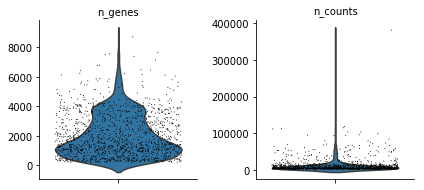

In [239]:
sc.pl.violin(adata, ['n_genes', 'n_counts'],jitter=0.4, multi_panel=True)

/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:318: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


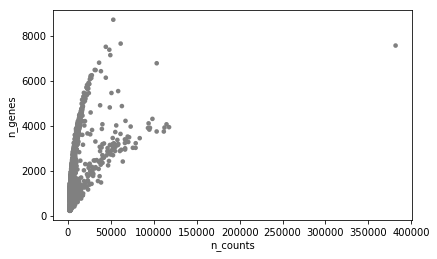

In [240]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

Because we're doing first exploratory pass let's remove cells that have more than 5000 genes given that those have higher chances of being doublets

In [241]:
#adata = adata[adata.obs['n_genes'] < 5000, :]

In [242]:
adata

AnnData object with n_obs × n_vars = 1408 × 16204 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes', 'n_counts'
    var: 'n_cells'

Following the standard pipeline, next we normalize, log, compute highly variable genes and scale

In [243]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [244]:
sc.pp.log1p(adata)


In [245]:
adata.raw = adata

In [246]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

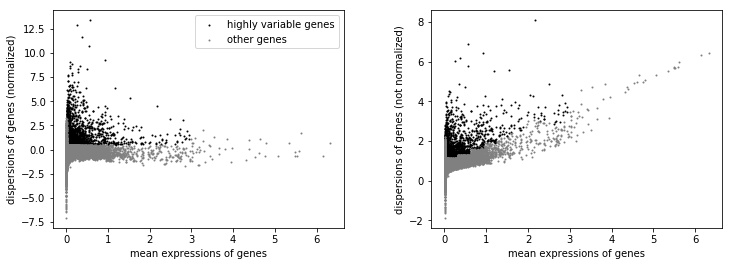

In [247]:
sc.pl.highly_variable_genes(adata)


In [248]:
adata


AnnData object with n_obs × n_vars = 1408 × 16204 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [249]:
sc.pp.scale(adata, max_value=10)


Next we compute PCA

In [250]:
sc.tl.pca(adata, svd_solver='arpack')


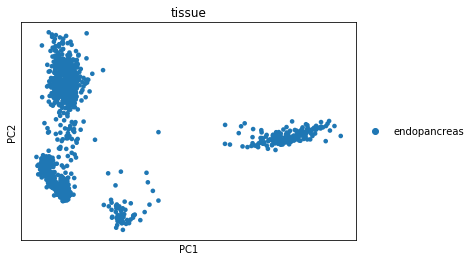

In [251]:
sc.pl.pca(adata, color='tissue')


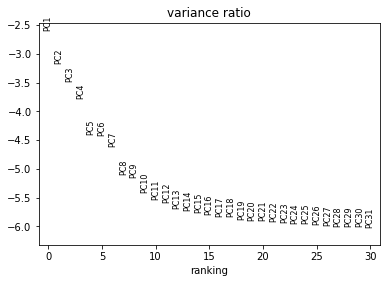

In [252]:
sc.pl.pca_variance_ratio(adata, log=True)


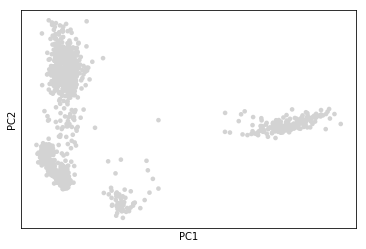

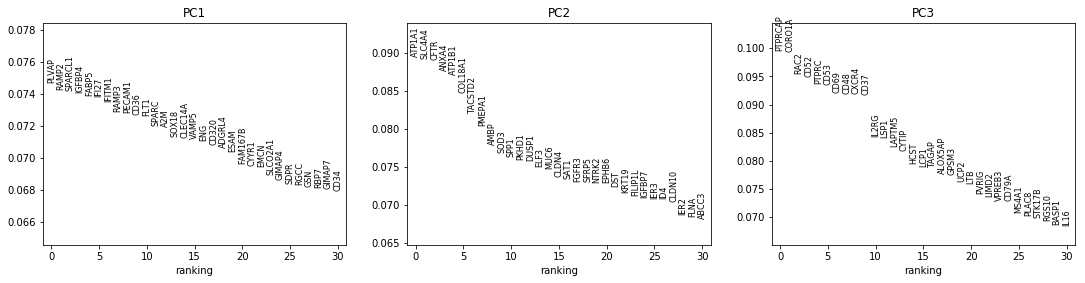

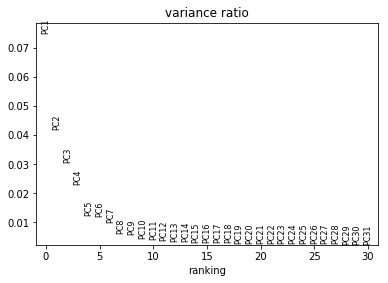

In [253]:
sc.pl.pca_overview(adata)

Now we're ready to start fishing out some structure in the data

In [254]:
sc.pp.neighbors(adata, n_neighbors=12, n_pcs=9)


In [255]:
sc.tl.louvain(adata)
sc.tl.leiden(adata)

In [256]:
sc.tl.umap(adata)


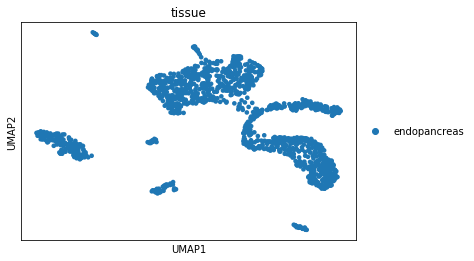

In [257]:
# sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color=['tissue'])

In [258]:
set(adata.obs['tissue'])

{'endopancreas'}

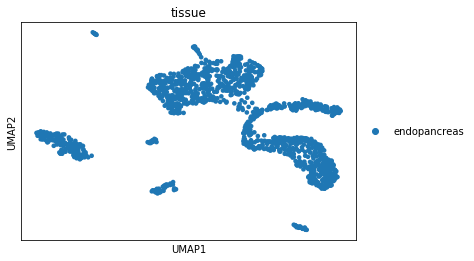

In [259]:
sc.pl.umap(adata, color=['tissue'],use_raw=False)

Let's take a look at one tissue as e.g. for batch effect...

In [260]:
adata.obs.columns

Index(['10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes',
       'n_counts', 'louvain', 'leiden'],
      dtype='object')

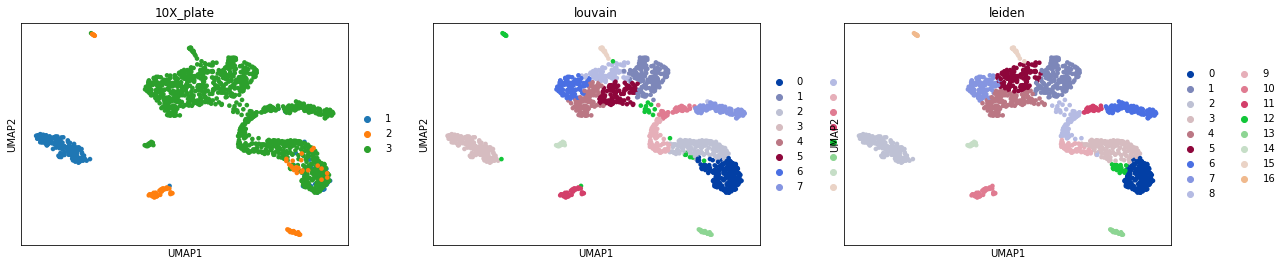

In [261]:
sc.pl.umap(adata, color=['10X_plate','louvain','leiden'])

Looking good! Into clustering...

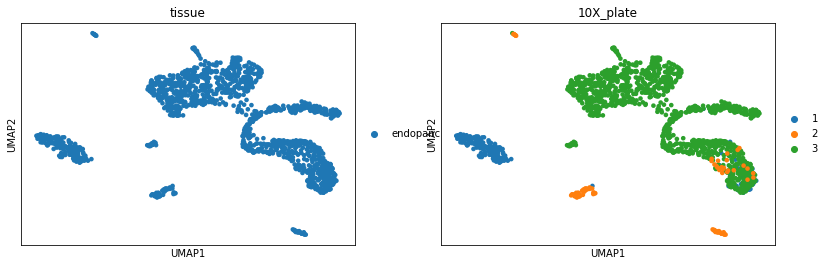

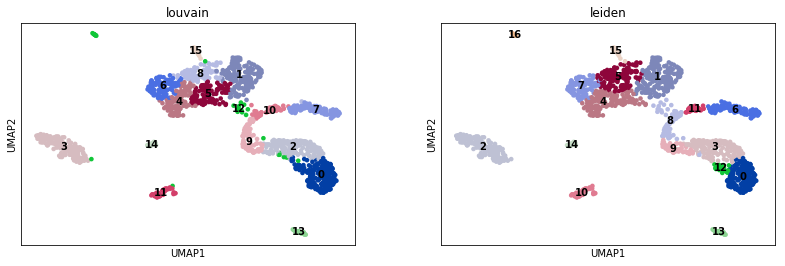

In [262]:
sc.pl.umap(adata, color=['tissue','10X_plate'])
sc.pl.umap(adata, color=['louvain','leiden'], legend_loc='on data')
#10X_plate: Plate 1 -- CD31+ endo/stroma
#10X_plate: Plate 2 -- Cd45+ islet/immune
#10X_plate: Plate 3 -- acinar/duct

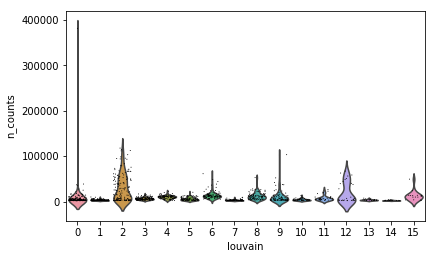

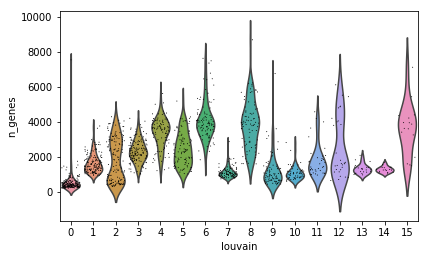

In [263]:
sc.pl.violin(adata, ['n_counts'],jitter=0.4, groupby='louvain')
sc.pl.violin(adata, ['n_genes'],jitter=0.4, groupby='louvain')

Using the wilcoxon rank test we can compute the marker genes for each of the 45 global clusters

In [269]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

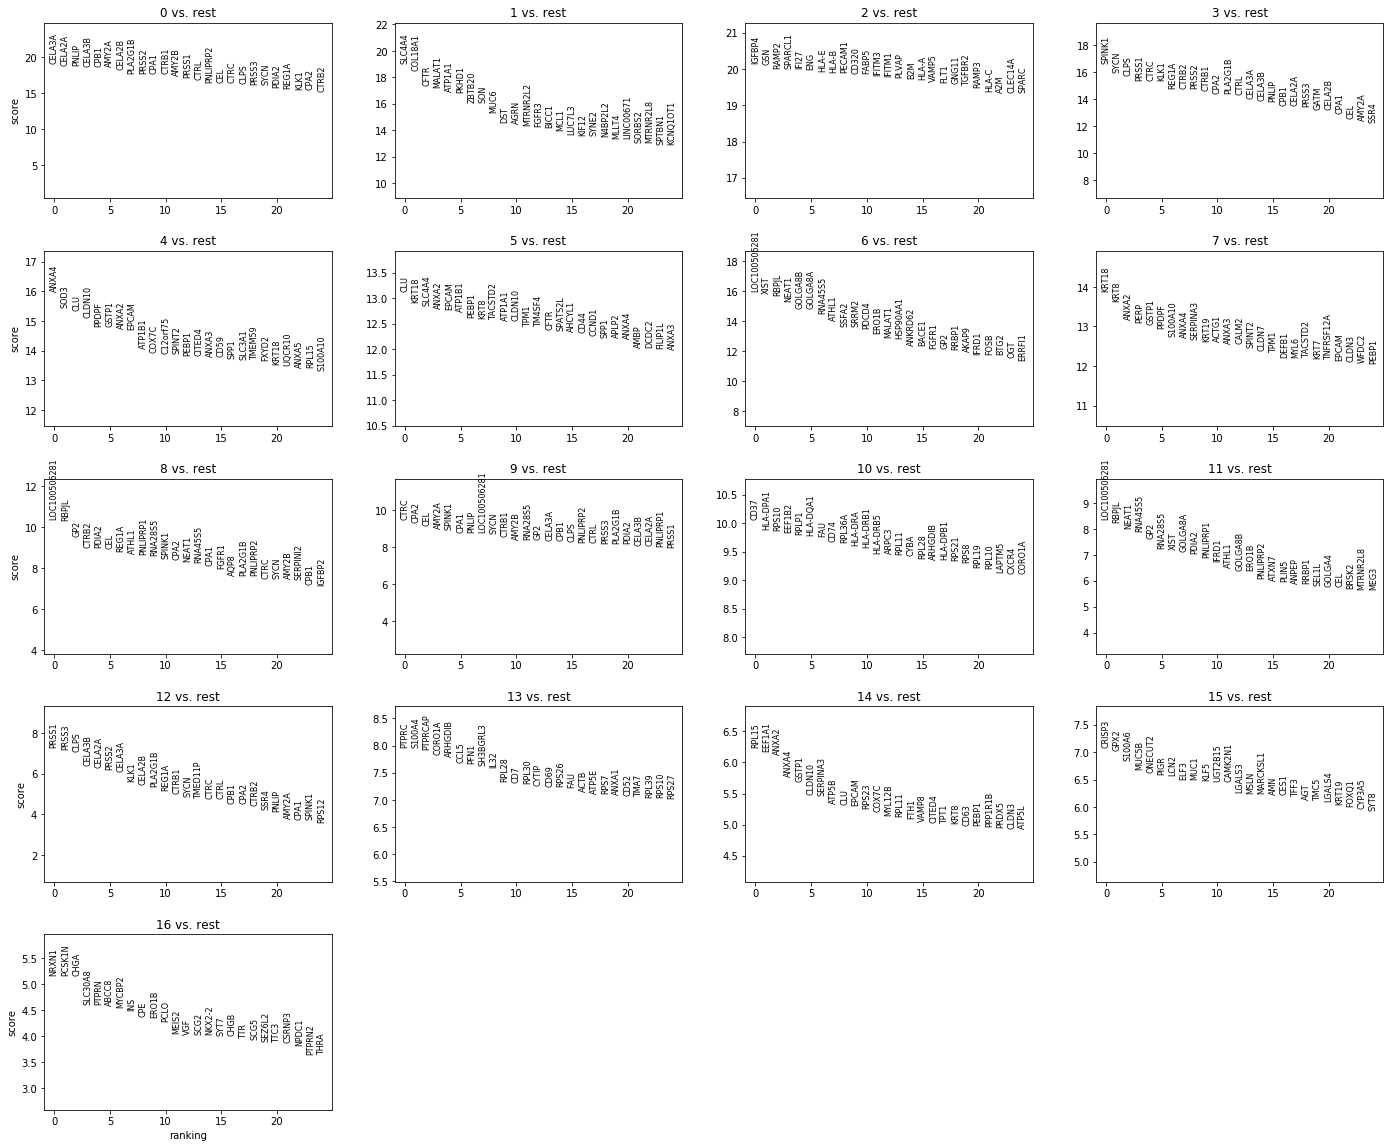

In [270]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [271]:
sapiens_rank_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
# sapiens_rank_genes.to_csv('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-global-rank-genes.csv')
sapiens_rank_genes.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,CELA3A,SLC4A4,IGFBP4,SPINK1,ANXA4,CLU,LOC100506281,KRT18,LOC100506281,CTRC,CD37,LOC100506281,PRSS1,PTPRC,RPL15,CRISP3,NRXN1
1,CELA2A,COL18A1,GSN,SYCN,SOD3,KRT18,XIST,KRT8,RBPJL,CPA2,HLA-DPA1,RBPJL,PRSS3,S100A4,EEF1A1,GPX2,PCSK1N
2,PNLIP,CFTR,RAMP2,CLPS,CLU,SLC4A4,RBPJL,ANXA2,GP2,CEL,RPS10,NEAT1,CLPS,PTPRCAP,ANXA2,S100A6,CHGA
3,CELA3B,MALAT1,SPARCL1,PRSS1,CLDN10,ANXA2,NEAT1,PERP,CTRB2,AMY2A,EEF1B2,RNA45S5,CELA3B,CORO1A,ANXA4,MUC5B,SLC30A8
4,CPB1,ATP1A1,IFI27,CTRC,PPDPF,EPCAM,GOLGA8B,GSTP1,PDIA2,SPINK1,RPLP1,GP2,CELA2A,ARHGDIB,GSTP1,ONECUT2,PTPRN
5,AMY2A,PKHD1,ENG,KLK1,GSTP1,ATP1B1,GOLGA8A,PPDPF,CEL,CPA1,HLA-DQA1,RNA28S5,PRSS2,CCL5,CLDN10,PIGR,ABCC8
6,CELA2B,ZBTB20,HLA-E,REG1A,ANXA2,PEBP1,RNA45S5,S100A10,REG1A,PNLIP,FAU,XIST,CELA3A,PFN1,SERPINA3,LCN2,MYCBP2
7,PLA2G1B,SON,HLA-B,CTRB2,EPCAM,KRT8,ATHL1,ANXA4,ATHL1,LOC100506281,CD74,GOLGA8A,KLK1,SH3BGRL3,ATP5B,ELF3,INS
8,PRSS2,MUC6,PECAM1,PRSS2,ATP1B1,TACSTD2,SSFA2,SERPINA3,PNLIPRP1,SYCN,RPL36A,PDIA2,CELA2B,IL32,CLU,MUC1,CPE
9,CPA1,DST,CD320,CTRB1,COX7C,ATP1A1,SRRM2,KRT19,RNA28S5,CTRB1,HLA-DRA,PNLIPRP1,PLA2G1B,RPL28,EPCAM,KLF5,ERO1B


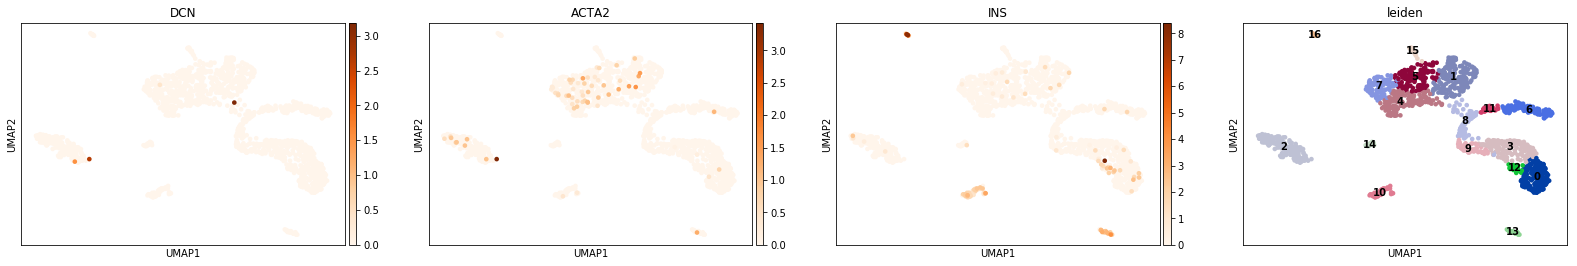

In [287]:
sc.pl.umap(adata,color=['DCN','ACTA2','INS','leiden'],legend_loc='on data',cmap='Oranges')


In [ ]:
bladder_louvain_cell_ontology_facs = {}
bladder_louvain_cell_ontology_facs['0'] = 'mast cell (also has basophil marker)' #TPSAB1,TPSB2
bladder_louvain_cell_ontology_facs['1'] = 'endothelial' #PECAM1, VWF, CLDN5
bladder_louvain_cell_ontology_facs['2'] = 'unknown'
bladder_louvain_cell_ontology_facs['3'] = 'fibroblast' #DCN, PDGFRA
bladder_louvain_cell_ontology_facs['4'] = ''
bladder_louvain_cell_ontology_facs[''] = ''
bladder_louvain_cell_ontology_facs[''] = ''
bladder_louvain_cell_ontology_facs

In [297]:
adata.obs.groupby(['leiden']).count()

,10X_plate,batch,tissue,method,sex,subjectid,n_genes,n_counts,louvain
leiden,,,,,,,,,
0,179,179,179,179,179,179,179,179,179
1,176,176,176,176,176,176,176,176,176
2,152,152,152,152,152,152,152,152,152
3,151,151,151,151,151,151,151,151,151
4,140,140,140,140,140,140,140,140,140
5,124,124,124,124,124,124,124,124,124
6,98,98,98,98,98,98,98,98,98
7,97,97,97,97,97,97,97,97,97
8,74,74,74,74,74,74,74,74,74


In [294]:
sapiens_rank_genes['16'].values

array(['NRXN1', 'PCSK1N', 'CHGA', 'SLC30A8', 'PTPRN', 'ABCC8', 'MYCBP2',
       'INS', 'CPE', 'ERO1B', 'PCLO', 'MEIS2', 'VGF', 'SCG2', 'NKX2-2',
       'SYT7', 'CHGB', 'TTR', 'SCG5', 'SEZ6L2', 'TTC3', 'CSRNP3', 'NPDC1',
       'PTPRN2', 'THRA', 'CHD7', 'ASH1L', 'TNRC6B', 'NEUROD1', 'PCSK2',
       'GAD2', 'SCG3', 'CACNA1A', 'GCG', 'BAIAP3', 'CACNA1D', 'RANBP2',
       'CEP126', 'SLC7A8', 'DDX24', 'MAFB', 'MTRNR2L2', 'KIF1A', 'TNRC6A',
       'NMT1', 'TANC2', 'SCGN', 'SPEN', 'MALAT1', 'ARGLU1', 'PSMA3-AS1',
       'ZKSCAN1', 'AKAP9', 'MACF1', 'IDS', 'TMEM259', 'LDLRAP1', 'PAPSS2',
       'ARFGEF3', 'ZNF827', 'PREPL', 'TOLLIP', 'KIAA1324', 'KCNK16',
       'G6PC2', 'CELF3', 'ISL1', 'LINC00643', 'RIMS2', 'CACNA2D1', 'PAX6',
       'GOLGA2', 'PCSK1', 'DDB1', 'VWA5B2', 'WNT4', 'GCNT1', 'PPP1R1A',
       'HERC2P2', 'ETV1', 'MAP1B', 'ZDHHC21', 'VEGFA', 'UNC80', 'TCF25',
       'CADPS', 'MARCH6', 'APLP1', 'PRPF8', 'GPX3', 'USH1C', 'GC',
       'CXXC4', 'MTHFR', 'PLD3', 'MTMR9LP', 'ATP2A3', 'RB

In [ ]:
pancreas_endocrine_louvain_cell_ontology_droplet = {}
pancreas_endocrine_louvain_cell_ontology_droplet['0'] = 'acinar' # CPA2,MUC1, RBPJL, PRSS1, SPINK1
pancreas_endocrine_louvain_cell_ontology_droplet['1'] = '?' # 
pancreas_endocrine_louvain_cell_ontology_droplet['2'] = 'endothelial' #VWF,CD34,VIM,CAV1,CLDN5,SPARC
pancreas_endocrine_louvain_cell_ontology_droplet['3'] = 'acinar'# SPINK1,PRSS1,AMY2A
pancreas_endocrine_louvain_cell_ontology_droplet['4'] = 'ductal' # EPCAM, KRT18,COX5B,ANXA2,CFTR
pancreas_endocrine_louvain_cell_ontology_droplet['5'] = 'ductal' # EPCAM, KRT18,COX5B,ANXA2,CFTR, SOX9
pancreas_endocrine_louvain_cell_ontology_droplet['6'] = 'acinar' # stressed, 'GOLGA8B', 'GOLGA8A', HSPH1,HSPB1, RBPJL
pancreas_endocrine_louvain_cell_ontology_droplet['7'] = 'ductal' # EPCAM, S100A11, S100A6, KRT18', 'KRT8
pancreas_endocrine_louvain_cell_ontology_droplet['8'] = 'acinar' #RBPJL, PRSS2, PRSS3, NEAT1, PRSS1, AMY2A
pancreas_endocrine_louvain_cell_ontology_droplet['9'] = 'acinar' # AMY2A', 'SPINK1, PRSS1, PRSS2, PRSS3,RBPJL, GOLGA8B
pancreas_endocrine_louvain_cell_ontology_droplet['10'] = 'immune' #CD74, CXCR4
pancreas_endocrine_louvain_cell_ontology_droplet['11'] = 'acinar' #RBPJL', 'NEAT1,GP2
pancreas_endocrine_louvain_cell_ontology_droplet['12'] = 'acinar' #PRSS1', 'PRSS3, SPINK1, AMY2A, INS
pancreas_endocrine_louvain_cell_ontology_droplet['13'] = 'immune' #PTPRC
pancreas_endocrine_louvain_cell_ontology_droplet['14'] = 'ductal' #EPCAM, KRT18, KRT8
pancreas_endocrine_louvain_cell_ontology_droplet['15'] = 'ductal' #S100A6, KRT19, MUC1, IL18
pancreas_endocrine_louvain_cell_ontology_droplet['16'] = 'islet' # INS, NKX2-2, CHGB, CHGA,MAFB,PAX6
pancreas_endocrine_louvain_cell_ontology_droplet

Look at different cell types. The idea is to subcluster based on the global cell 

In [ ]:
bladder_epithelial = adata(adata.obs['leiden'].isin(['0','11']))